# Разработка стратегии взаимодействия с клиентами в фитнес - клубе

Целью исследования является ращработка стратегии взаимодействия с клиентами в фитнес клубе для снижения оттока посетителей и увеличения прибыли.

Данные для исследования представлены следующими признаками:


Данные клиента за предыдущий до проверки факта оттока месяц:
- 'Churn' — факт оттока в текущем месяце;
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')  

In [2]:
#зададим настрйоки для графиков
sns.set(rc={'figure.figsize':(15,5)}, color_codes=True, font_scale=1.6, palette ='coolwarm')

## Предобработка данных

In [3]:
df = pd.read_csv("/datasets/gym_churn.csv")

In [4]:
#визуально изучим данные по 5 случайным строкам
df.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1391,1,1,1,1,1,12,1,32,90.744181,12.0,5,1.927349,1.962429,0
3609,1,1,0,0,1,1,1,25,56.104114,1.0,2,2.138147,2.664432,1
1870,0,1,1,1,1,12,0,24,255.245653,12.0,2,0.731377,0.581817,0
3031,1,1,0,0,1,1,1,28,87.740231,1.0,1,2.471017,1.708861,1
2507,0,1,1,0,1,12,1,28,0.993240,12.0,2,0.544632,0.532543,0


In [5]:
#изучим общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [6]:
#проверим данные на наличие дубликатов
df.duplicated().sum()

0

In [7]:
#приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [8]:
#приведем столбец с данными о количестве месяцев до окончания абонемента к целочисленному формату
df['month_to_end_contract'] = df['month_to_end_contract'].astype(int)

### Вывод

Всего в данных 4000 строк, пропуски и дбликаты отсутсвуют. Типы данных приведены в соответсвие - преобразовано поле 'month_to_end_contract' до целочисленного формата. Назавния столцов приведены к нижнему регистру.

## 2.Исследовательский анализ данных (EDA)

In [9]:
# изучим данные методом describe
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000



По данным из таблицы можно составить следующий портрет среднестатичтического клиента:

- проживает или работаем недалеко от фитнес клуба (84% клиентов)
- средний возраст 29 лет
- в среднем тратит на дополнительные услуги - 147
- посещает клуб 2 раза в неделю
    


In [10]:
# так же разобьем данные на две выборки по признаку оттока и изучим их по отдельности
df_churn_0 = df.query('churn == 0')
df_churn_1 = df.query('churn == 1')

In [11]:
#данные по клиентам ушедшим в отток
df_churn_1.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


In [12]:
#данные по оставшимся клиентам
df_churn_0.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


In [13]:
#Рассчитаем доолюклиентов ушедших в отток.
print("Доля клиентов ушедших в отток: {:.2f}".format(len(df_churn_1)/len(df)))

Доля клиентов ушедших в отток: 0.27


In [14]:
# сгруппируем данные по факту оттока
df_churn = df.groupby('churn').mean().reset_index()
df_churn

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


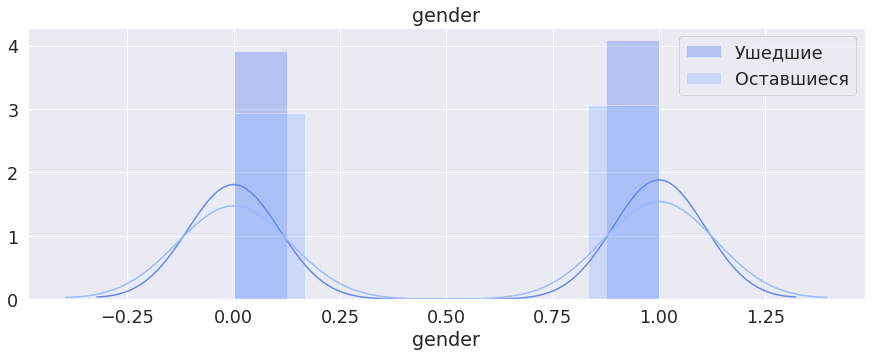

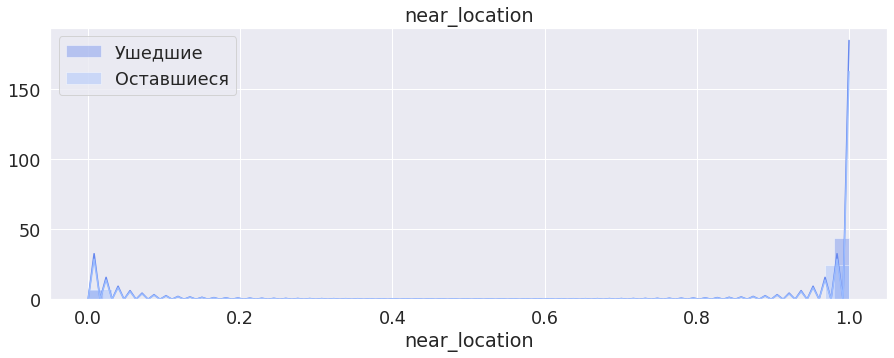

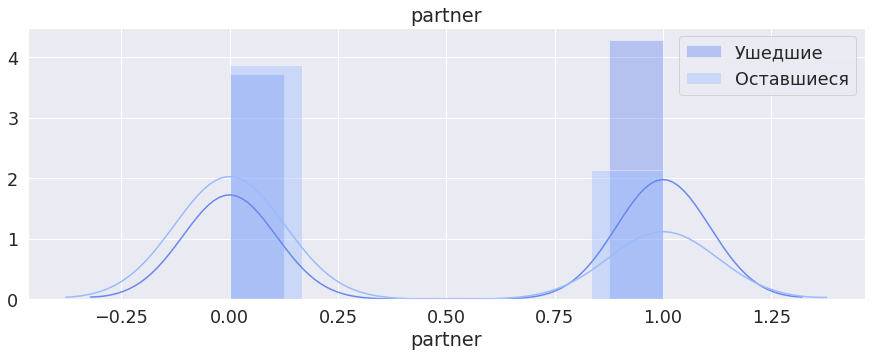

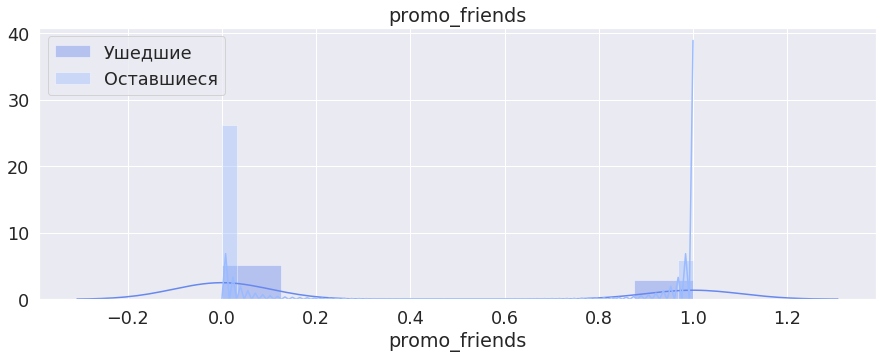

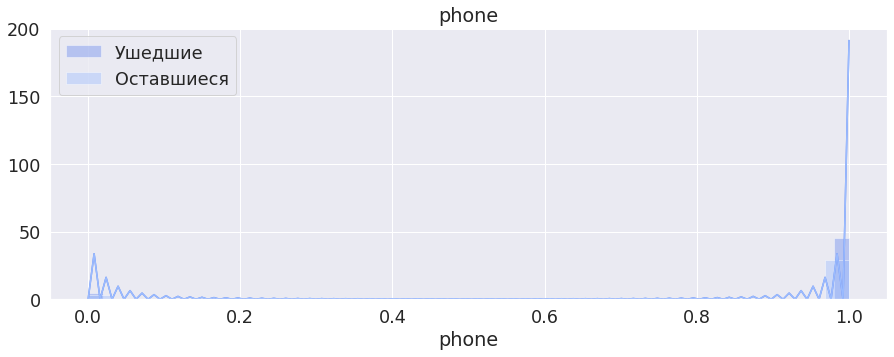

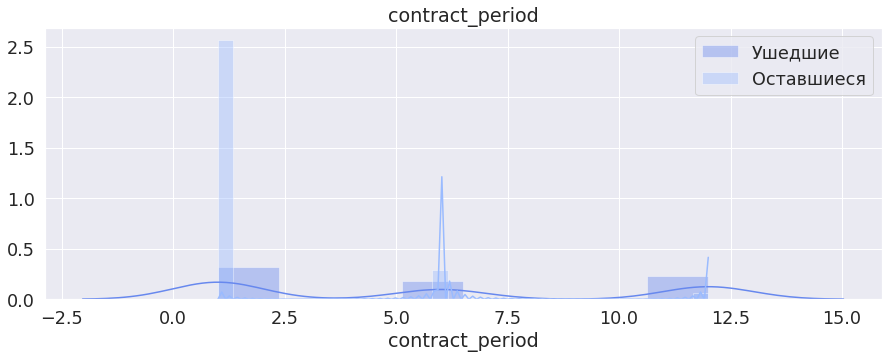

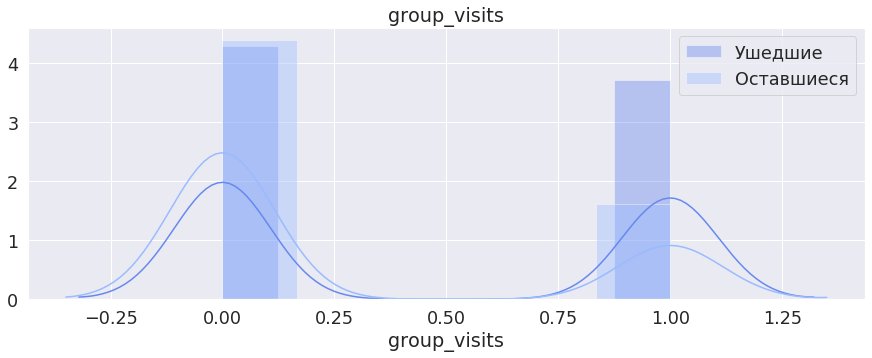

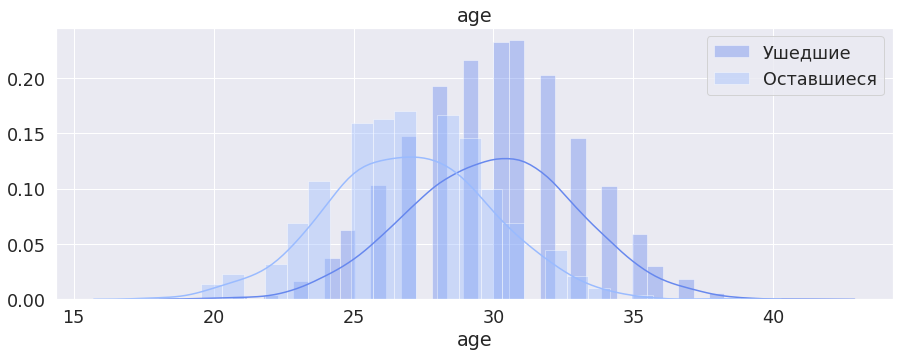

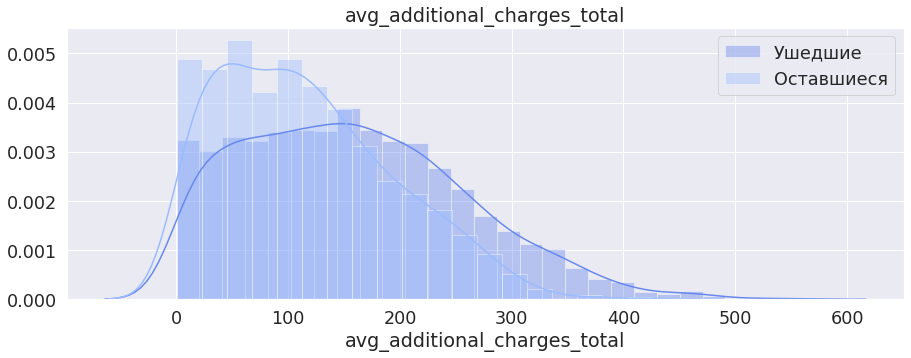

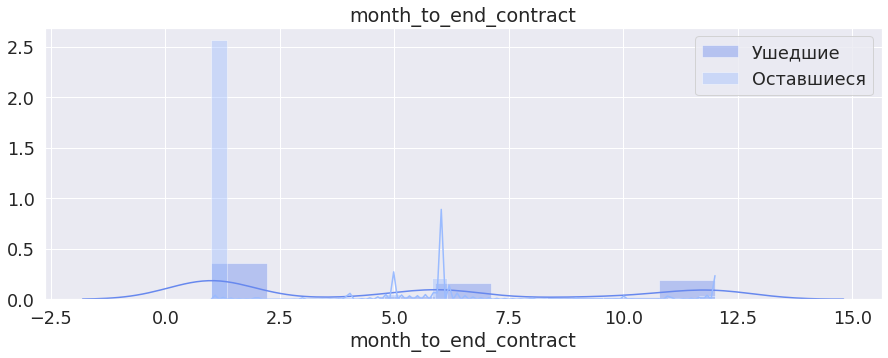

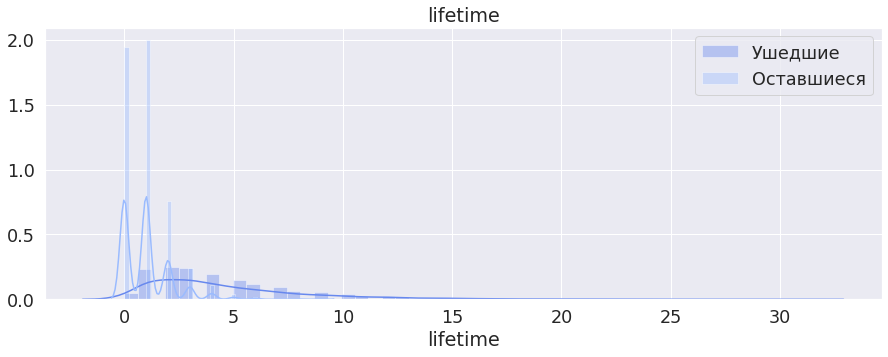

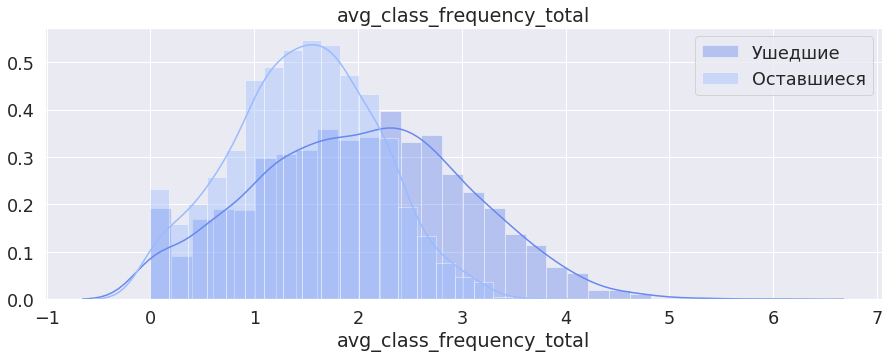

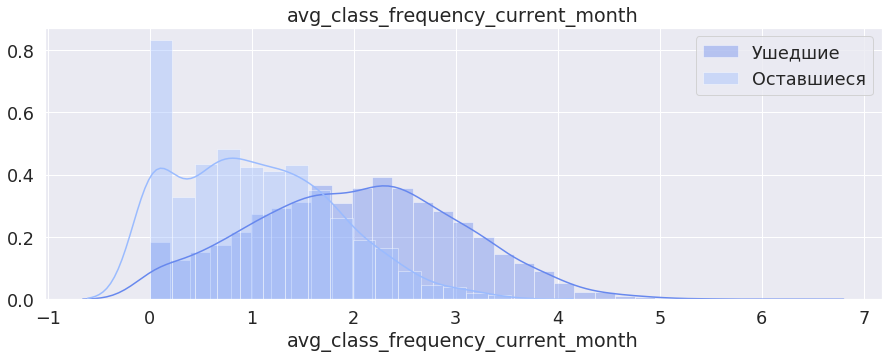

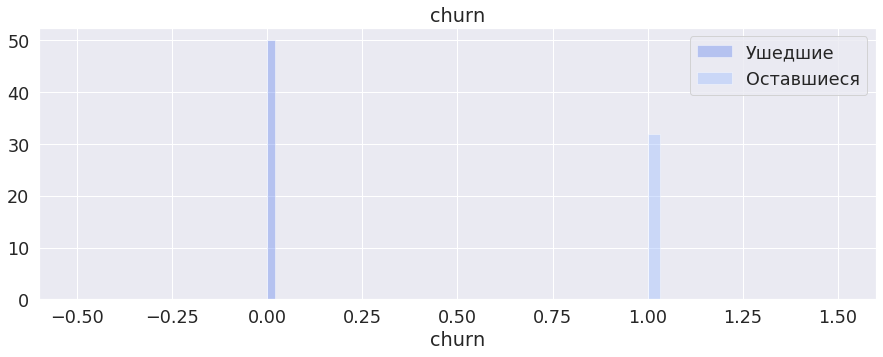

In [15]:
#отдельно построим гистограммы распределения по дискретным переменным

columns = list(df.columns)#['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'lifetime', 'age','contract_period', 'month_to_end_contract']
for i in columns:
    plt.title(i)
    sns.distplot(df_churn_0[i])
    sns.distplot(df_churn_1[i])
    plt.legend(['Оставшиеся', 'Ушедшие'])
    plt.show()


В разбиении по факту оттока удалось проследить следующие различия и сходства:
 - отток не зависит от пола, примерно равные доли оттока для обеих полов
 - нет значимого различия между группами по признаку - близаость местоположения 76% и 87%
 - клиенты, являющиеся сотрудниками клуба реже попадают в отток
 - из анализа гистограммы по возрастам видим, что ушедшие клиента в среднем на 3 года моложе (27 лет)
 - так же у клиентов попавших в отток срок абонемента значително ниже (в среднем на три месяца)
 - пользуся услугами клуюа клиенты попавшие в отток так же значительно дольше -  среднем 5 месяце против 1 у клиентов попавших в ооток
 - так же клиенты не попавшие в ооток посещают в неделю фитнес клуб чаще примрно на 1 раз
    


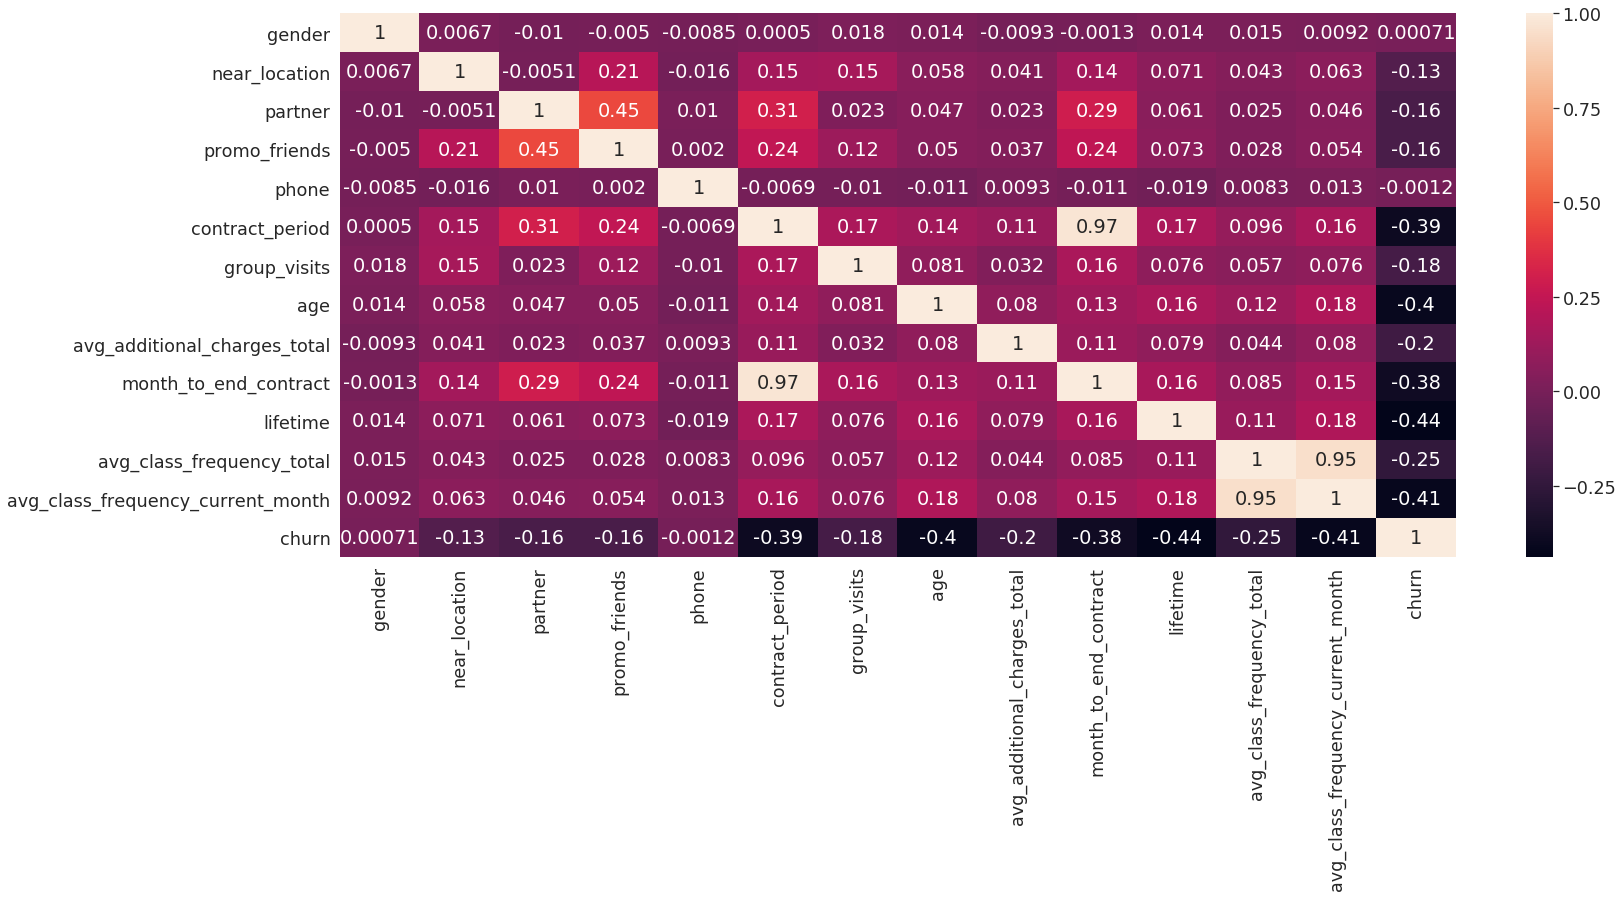

In [16]:
#построим матрицу корреляции для признаков
corr = df.corr()
plt.figure(figsize =(25,10))
sns.heatmap(corr, annot=True)
plt.show()

Видимых зависимостей на матрице корреляции не обнаружено.

## Построение модели для прогнозирования оттока клиентов.

### Использование логистической регрессии

In [17]:
# разделим данные на признаки и целевую переменную
X = df.drop(columns = ['churn'])
y = df['churn']

In [18]:
#обозначим валидационную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
#проведем стандартизацию
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [20]:
#объявим и обучим модель
model = LogisticRegression() 
model.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#сделаем прогнозы
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:,1]

### Использование алгоритма слуайного леса

In [22]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]


### Применение метрик

In [23]:
m_names = ['accuracy_score', 'precision_score', 'recall_score']
metrics = [accuracy_score, precision_score, recall_score] 
predict =[predictions, rf_predictions]
pred_name =['LogRegression', 'RandomForest']

log =[]
forest =[]
for i in range(3):
    l = metrics[i](y_test, predictions)
    f = metrics[i](y_test, rf_predictions)
    log.append(l)
    forest.append(f)


In [24]:
#соберем небольшой датафрейм для визуализации метрик
met = pd.DataFrame({'LogRegression':log, 'RandomForest':forest})
met.round(2)

,LogRegression,RandomForest
0,0.92,0.92
1,0.85,0.84
2,0.83,0.81


В результате примения метрие к построенным моделям можем сделать вывод, что на логистическая регрессия больше подходит для осуществления предсказаний по текущим данным.

## Кластеризация клиентов

In [25]:
#стандартизируем и нормулизуем данные
scaler = StandardScaler() 
X_sc = scaler.fit_transform(X) 


# Зададим "стандартизатор"
scaler = StandardScaler()

# Стандартизируем данные
X_st = scaler.fit_transform(X)

In [26]:
# построим матрицу linked
linked = linkage(X_sc, method = 'ward')

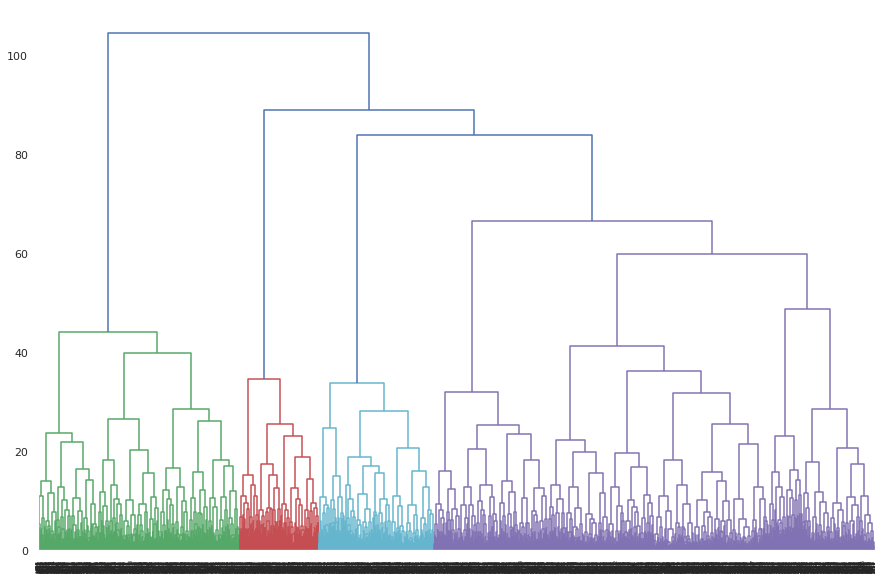

In [33]:
# #отрисуем дендограмму для определения количества кластеров
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Оптимальное количество кластеров - 5

In [28]:
#применим алгоритм K-means
km = KMeans(n_clusters = 5, random_state = 0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc)

#создадим отдельный столбец с номерами кластеров
df['clasters'] = labels

In [29]:
# сгруппируем данные по кластерам
df_grouped_clasters = df.groupby('clasters').mean().reset_index()
df_grouped_clasters 

,clasters,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


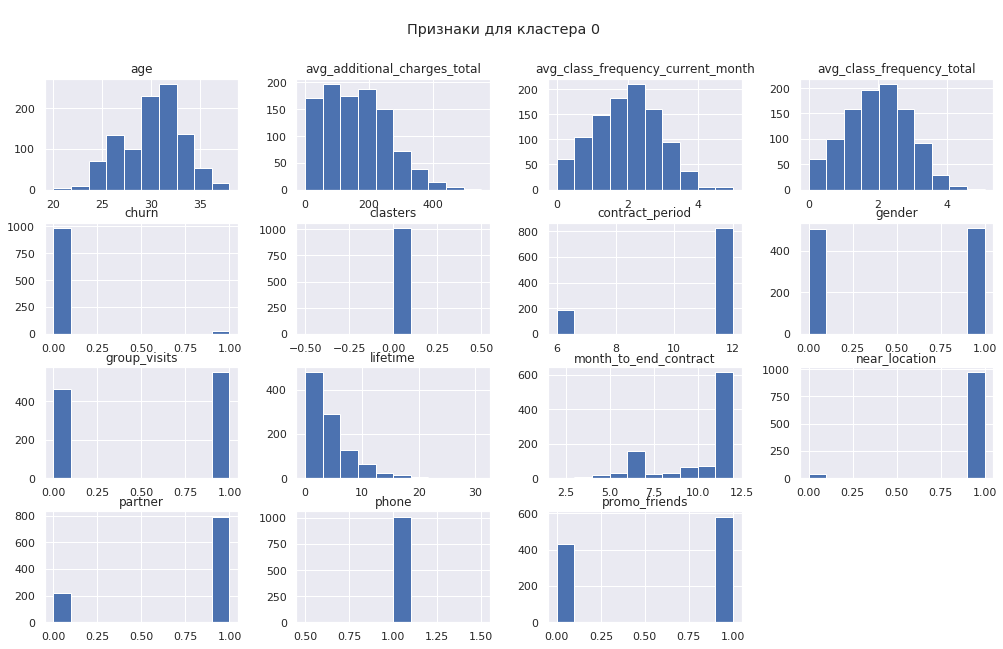

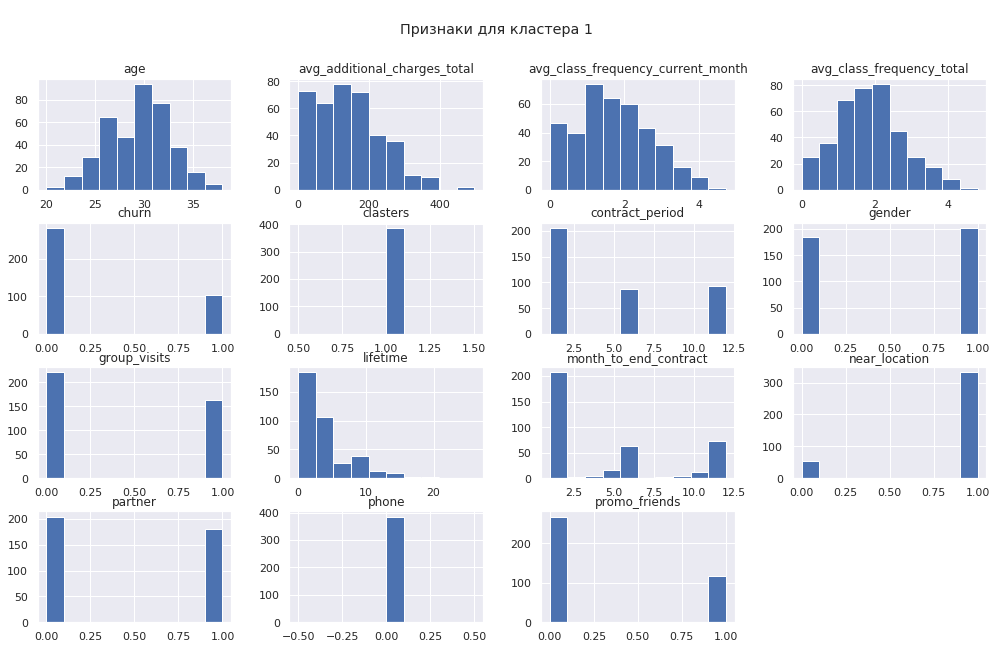

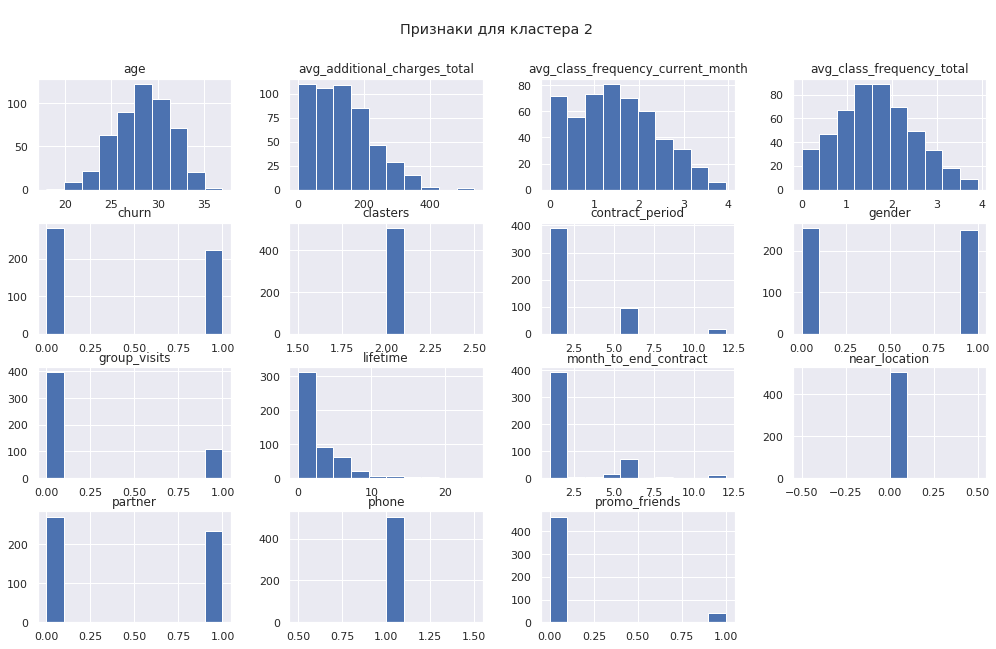

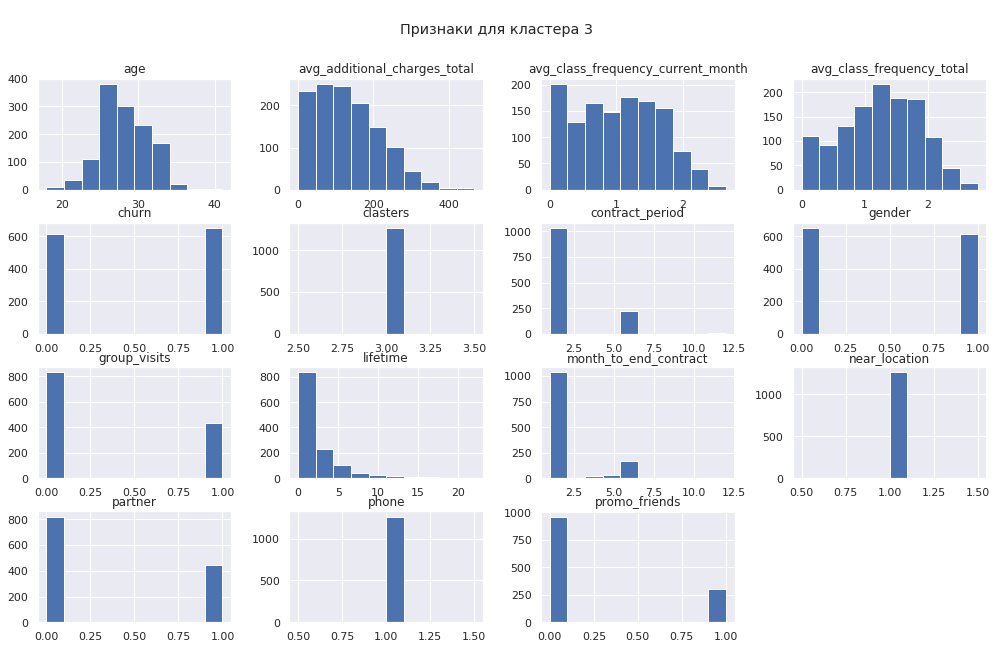

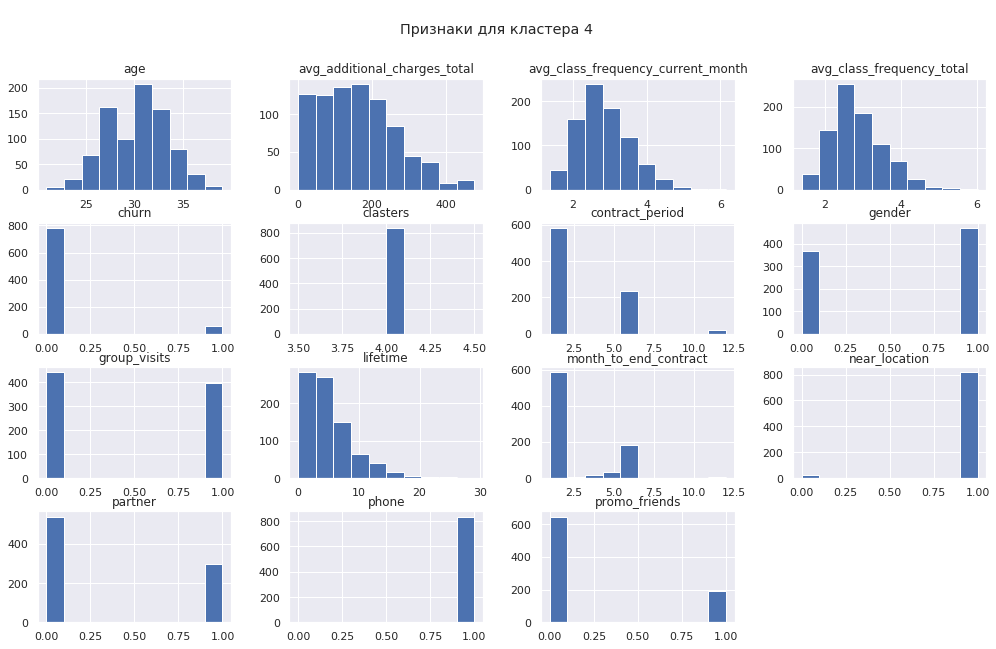

In [30]:
sns.set(font_scale=1) 
for value in [0, 1, 2, 3, 4]:
    df[df['clasters']==value].hist(figsize=(17,10))
    plt.suptitle('\nПризнаки для кластера {}'.format(value))
    plt.show()

### Описание кластеров.

In [31]:
#перевернем таблицу для удобства
df_grouped_clasters.set_index('clasters').T

clasters,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
near_location,0.959446,0.862338,0.000000,1.000000,0.976105
partner,0.783383,0.470130,0.463366,0.350238,0.356033
promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
phone,1.000000,0.000000,1.000000,1.000000,0.998805
contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
age,29.980218,29.301299,28.477228,28.167987,30.127838
avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


#### Кластер 0
- 26 % процент оттока 
- 81 процен клиентов проживают или работают не далеко от зала,
- 47% процентов партнеры
- посещют - 3,9 месяца
- средня частота посящений за предыдущий месяц 1.7 раза
- 30% пришли по приглашению друзей
- средний возраст 29 лет
- не имеют зафиксированных номеров телефонов

#### Кластер 1
- 55 % отток (самый высокий процент оттока)
- нет клиентов являющихся сотрудниками клуба
- 86% пришли по приглашению от друзей
- клиенты клуба 2.3 месяца
- 81% проживает поблизости
- 32% посещяет групповые программы (второй показатель среди кластеров)

#### Кластер 2
- 48% отток
- 85% проживают поблизости
- 5 месяцев клиенты клуба
- 30 лет средний возраст


#### Кластер 3
- отток 39 %
- средний возраст 28 лет
- 100% сотрудники клуба
- 75 процентов проживает недалеко от клуба



#### Кластер 4

- отток 23%
- 10 месяцев до окончания действия абонемента (самый высокий показатель по кластерам)
- больште траты на дополнительные услуги
- период абонемента 11 месяцев
- 94% живут недалеко от зала


In [32]:
df_grouped_clasters.iloc[0]

clasters                               0.000000
gender                                 0.502473
near_location                          0.959446
partner                                0.783383
promo_friends                          0.574679
phone                                  1.000000
contract_period                       10.884273
group_visits                           0.543027
age                                   29.980218
avg_additional_charges_total         160.706969
month_to_end_contract                  9.950544
lifetime                               4.738872
avg_class_frequency_total              1.983305
avg_class_frequency_current_month      1.976225
churn                                  0.027695
Name: 0, dtype: float64

## Общий вывод и рекомендации.

В результате исследования была проведена работа по предобработке, исследованию и кластеризации данных.

В результате кластеризации клиенты были разделены на 4 кластера. Наибольший отток наблюдается в первом кластере. 

**Характеризуется он следующими параметрами:**

- 55 % отток 
- нет клиентов являющихся сотрудниками клуба
- 86% пришли по приглашению от друзей
- клиенты клуба 2,3 месяца
- 81% проживает поблизости
- 32% посещяет групповые программы (второй показатель среди кластеров)
- 1,8 месяцев период действия текущего абонемента


**Наименьший отток в четвертом кластере.**

- отток 23%
- 10 месяцев до окончания действия абонемента (самый высокий показатель по кластерам)
- больште траты на дополнительные услуги
- период действия текущего абонемента 11 месяцев
- 94% живут недалеко от зала
- 56% посещают групповые программы


**К рекомендациям по удержанию клиентов можно отнести следующее:**

- развить акцию "приведи друга" таким образом, чтобы у клиента была мотивация ходить дольше чем 1 месяц (например возврат средств через месяц посещений при условии, что клиент пользовался услугами) - клиент успеет привыкнуть к тренировкам, таким образом можно уменьшить процент оттока в данном кластере;

- активно продвигать групповые программы, в кластерах  с высоким проценом посещения групповых тренировок меньше отток;

- в большем количестве продавать абонементы на длительный срок;

- активно внедрять и продвигать разнообразные платные услуги
